In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import concurrent.futures as cf
import json

In [2]:
# Read data
df = pd.read_csv("../data/data.csv")
df = df.drop_duplicates()

In [3]:
df

,name,title,rating
0,Spaxe,Pokemon Sword,5
1,Spaxe,Luigi's Mansion 3,9
2,Ninjasuite,Pokemon Sword,3
3,Zerato,Pokemon Sword,5
4,Alvertin,Etrian Odyssey 2 Untold: The Fafnir Knight,9
...,...,...,...
378519,tonyhank232,Far Cry 4,9
378520,jorge7ejea,The Witcher 3: Wild Hunt,0
378521,IDDQYU,The Witcher 3: Wild Hunt,10
378522,Estev0n,The Witcher 3: Wild Hunt,10


In [4]:
data_grouped = df.groupby("name")

In [5]:
data_counts = data_grouped.size()
data_counts = data_counts.loc[data_counts > 20]
data_counts = data_counts.sort_values()
data_mean = data_counts.mean()
data_med = data_counts.median()

# Afficher les résultats
data_counts

name
Galix               21
Belarus_neckoby     21
bhappenstance       21
kstud1              21
Ponds98             21
                  ... 
Vaulie             584
drlowdon           608
Hangrad            817
SuperkenGaming     819
fiachra            834
Length: 2314, dtype: int64

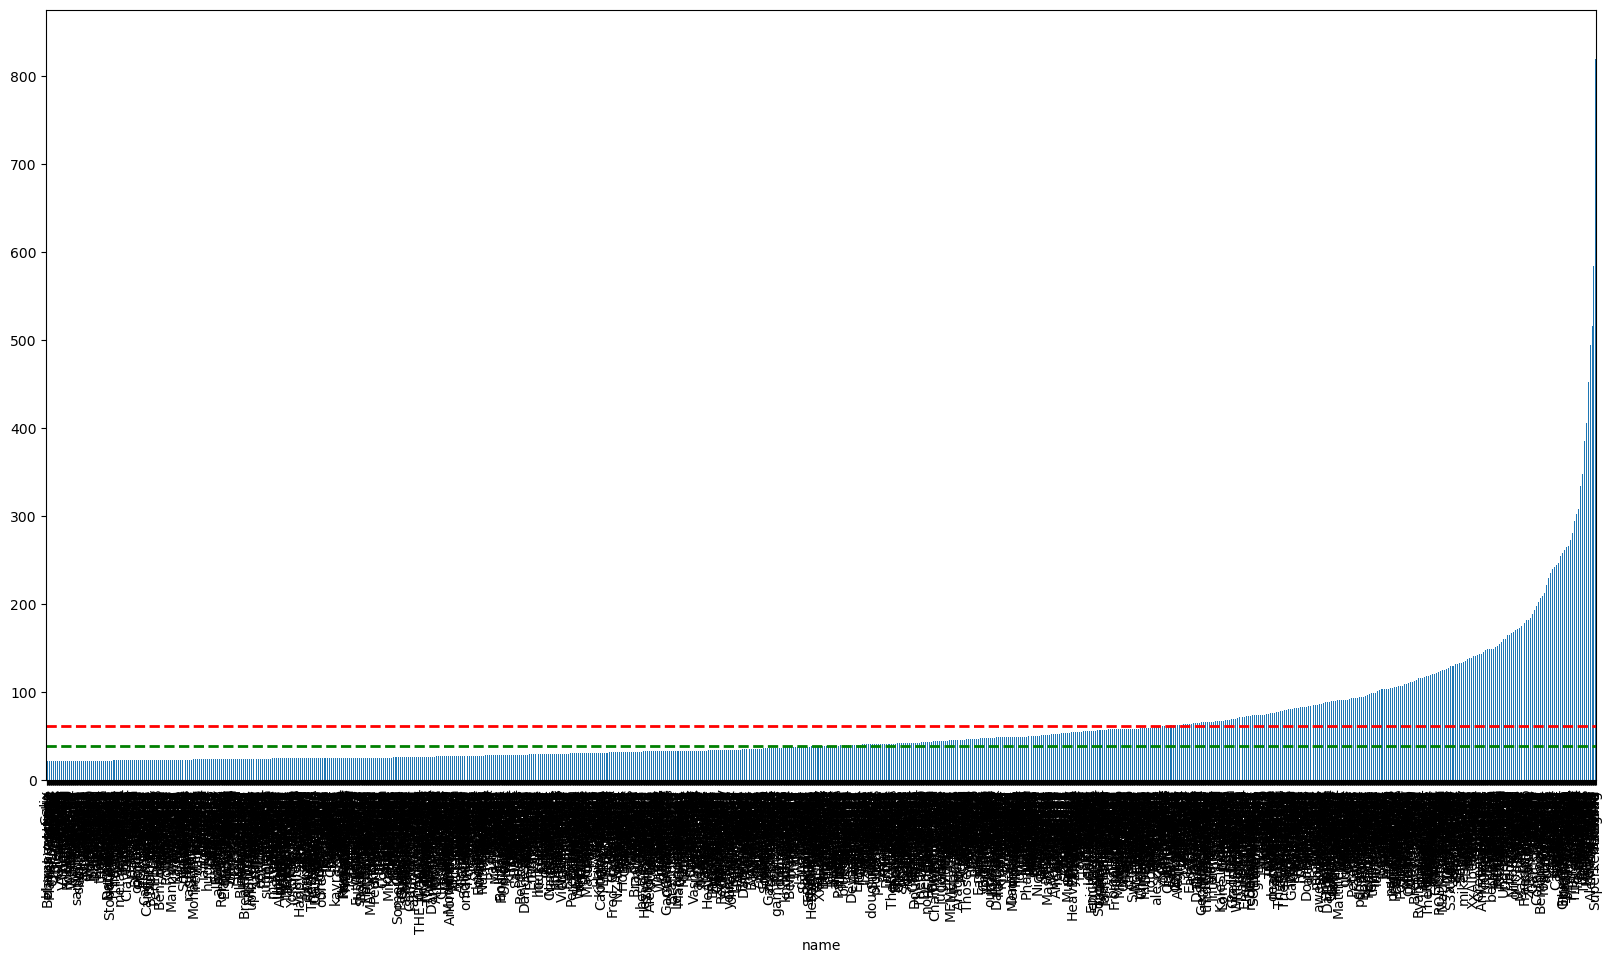

In [6]:
# Afficher un diagramme en barres
plt.figure(figsize=(20, 10))
data_counts.plot(kind="bar")

# Ajouter la moyenne à l'axe des y
plt.axhline(data_mean, color="red", linestyle="dashed", linewidth=2)

# Ajouter la médiane à l'axe des y
plt.axhline(data_med, color="green", linestyle="dashed", linewidth=2)

# Afficher le diagramme
plt.show()

In [10]:
# Récupère les jeux joués par les profils qui ont joués à plus de 20 jeux différents
profils = df.loc[df['name'].isin(data_counts.index)]

In [11]:
profils

,name,title,rating
73,PewPewMcP,Death's Door,9
74,PewPewMcP,Bright Memory: Infinite,8
75,PewPewMcP,Ys IX: Monstrum Nox,9
76,PewPewMcP,Pokemon Shining Pearl,4
77,PewPewMcP,Pokemon Brilliant Diamond,4
...,...,...,...
378515,tonyhank232,Batman: Arkham Knight,9
378516,tonyhank232,Bully,9
378517,tonyhank232,Metro Redux,8
378518,tonyhank232,Dragon Age: Inquisition,8


In [785]:
rawg = pd.read_json('../data/rawgfinal.json')

In [767]:
mask = profils['title'].isin(rawg['name'])
mask2 = ~mask
print(profils['title'][mask])
print(profils['title'][mask2].drop_duplicates())

73                     Death's Door
74          Bright Memory: Infinite
75              Ys IX: Monstrum Nox
76            Pokemon Shining Pearl
77        Pokemon Brilliant Diamond
                    ...            
378515        Batman: Arkham Knight
378516                        Bully
378517                  Metro Redux
378518      Dragon Age: Inquisition
378519                    Far Cry 4
Name: title, Length: 140517, dtype: object
1270                                  BROK the InvestiGator
1594                                              AMID EVIL
4036                                               RayStorm
4405                                    Deliver Us The Moon
4939            Age of Empires II: The Conquerors Expansion
5090                        The Uncertain: Light at the End
7113                                                 Trauma
7126                                                 ONRUSH
11180                                         The Uncertain
11724                